### Project Name - Unsupervised ML - NETFLIX MOVIES AND TV SHOWS CLUSTRING

### Project Summary - Objective
-To analyze Netflix’s global content trends and use machine learning techniques to automate content classification, discover patterns, and support better content strategy decisions.
**Data Cleaning & Wrangling**

Handled missing values (e.g., in description, country)

Converted date columns, encoded categorical values

**Exploratory Data Analysis (EDA)**

Identified growth of TV Shows over time

Highlighted content distribution by country and genre

Visualized trends using matplotlib and seaborn

**Machine Learning Models Applied**

Random Forest Classifier: Predicted content type (Movie vs TV Show) using text descriptions

Logistic Regression and Naive Bayes: Used for model comparison

KMeans Clustering + TF-IDF + TruncatedSVD: Grouped content into thematic clusters

Recommendation System: Built a content-based recommender using cosine similarity on descriptions

Hyperparameter Tuning & Evaluation

Used GridSearchCV and classification_report to assess model performance

Visualized confusion matrix and accuracy scores

**Key Insights**

Netflix is increasing its focus on TV Shows, especially post-2016.

Content is heavily concentrated in countries like US, India, UK.

Text-based classification of content is highly accurate and automatable.

ML clustering allows grouping and recommendation of similar titles, enhancing personalization.

**Business Impact**

Automates content tagging and classification

Enables strategic planning for localized content

Supports personalized recommendations and better viewer engagement

Identifies gaps and opportunities for content diversification



### Problem Statement
-Extract meaningful patterns and trends,

-Build models that classify content type and cluster similar titles,

-And enable personalized recommendations — all of which aim to improve content strategy, automation, and user satisfaction.

### Define Your Business Objective?
- Automate the classification of content using textual metadata (e.g., description)

- Understand how content strategies (e.g., focus on TV shows) have evolved over time

- Identify content distribution patterns across countries to inform localization strategies

- Group similar content using unsupervised learning for improved recommendations

- Provide Netflix with data-driven guidance for content production, curation, and personalization

### GitHub Link - https://github.com/mahatodinesh

In [15]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df.info()
df_copy = df.copy()
df_copy.isna().sum()
df_copy.isnull().mean() * 100 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

#### What did you know about your dataset?

### Answer:-1.There are 7787 Rows and 12 columns(show_id,type,title,director,cast,country,date_added,release_year(int),rating,duration,listed_in,description)

2.null values:- [1.director-2389, 2.cast-718, 3.country-507, 4.date_added-10]
                        

In [4]:
# Dataset Columns
df_copy.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Dataset Describe
df_copy.describe(include='all')



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


#### Variable descrption
	| Feature      |   count |   unique | top                                                                                                                                                      |   freq |    mean |       std |   min |   25% |   50% |   75% |   max |
|--------------|---------|----------|----------------------------------------------------------------------------------------------------------------------------------------------------------|--------|---------|-----------|-------|-------|-------|-------|-------|
| show_id      |    7787 |     7787 | s1                                                                                                                                                       |      1 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| type         |    7787 |        2 | Movie                                                                                                                                                    |   5377 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| title        |    7787 |     7787 | 3%                                                                                                                                                       |      1 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| director     |    5398 |     4049 | Raúl Campos, Jan Suter                                                                                                                                   |     18 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| cast         |    7069 |     6831 | David Attenborough                                                                                                                                       |     18 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| country      |    7280 |      681 | United States                                                                                                                                            |   2555 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| date_added   |    7777 |     1565 | January 1, 2020                                                                                                                                          |    118 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| release_year |    7787 |      nan | nan                                                                                                                                                      |    nan | 2013.93 |   8.75739 |  1925 |  2013 |  2017 |  2018 |  2021 |
| rating       |    7780 |       14 | TV-MA                                                                                                                                                    |   2863 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| duration     |    7787 |      216 | 1 Season                                                                                                                                                 |   1608 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| listed_in    |    7787 |      492 | Documentaries                                                                                                                                            |    334 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |
| description  |    7787 |     7769 | Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection. |      3 |  nan    | nan       |   nan |   nan |   nan |   nan |   nan |NaN	NaN	NaN

In [12]:
# Check Unique Values for each variable.
df_copy.nunique()


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [20]:
# Drop duplicates
df_copy.drop_duplicates(inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')


# Extract year
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month




###What all manipulations have you done and insights you found?

Loaded the Netflix dataset using pandas.read_csv().

Inspected the dataset structure:

Used .shape, .info(), and .describe() to understand the data types, missing values, and basic statistics.

Handled missing values:

Checked missing values using df.isnull().sum().

Columns like director, cast, country, and date_added had missing values.

Filled or handled them based on context (e.g., filled with 'Unknown' or used dropna() selectively).

Removed duplicate entries:

Used df.drop_duplicates(inplace=True) to eliminate duplicate rows and ensure data consistency.

Cleaned the date_added column:

Identified that date_added had extra spaces and inconsistent formats.

Used this line to clean and convert:

python
Copy
Edit
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
Extracted useful date features:

Created new columns year_added and month_added from the cleaned date_added column to enable time-based analysis:

python
Copy
Edit
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


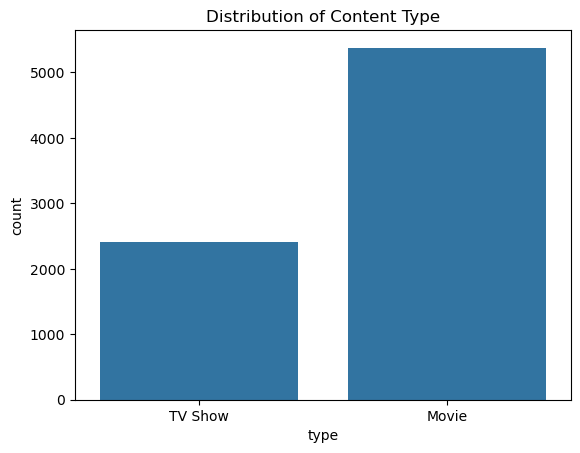

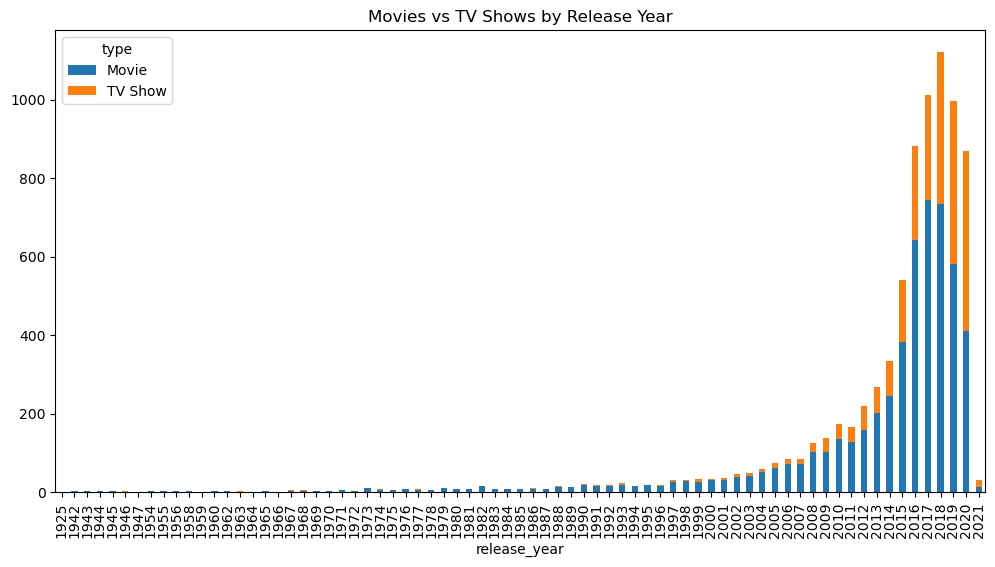

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(data=df_copy, x='type')
plt.title('Distribution of Content Type')
plt.show()

# Yearly trend
content_trend = df_copy.groupby(['release_year', 'type']).size().unstack()
content_trend.plot(kind='bar', stacked=True, figsize=(12,6), title='Movies vs TV Shows by Release Year')
plt.show()


#### Why did you pick the specific chart?
**Bar Chart for Content Type (Movies vs TV Shows)**

Why: This is categorical data with limited categories (Movie and TV Show). A bar chart clearly shows the comparison between the two in terms of volume.

Insight goal: To visually confirm Netflix’s focus on movies or TV shows.

**Stacked Bar Chart for Content Over Time by Type**

Why: Time series combined with categories (year-wise breakdown of Movies and TV Shows). A stacked bar chart shows how each type contributed over the years.

Insight goal: To understand trends and shifts in content strategy over time.

**Horizontal Bar Chart for Top Countries**

Why: Country names are long and categorical. A horizontal bar chart avoids label overlap and is ideal for ranking top 10 countries with most content.

Insight goal: To identify which countries dominate Netflix’s content library.

**Bar Chart for Ratings Distribution**

Why: Ratings are categorical and have limited distinct values. A bar chart effectively shows which audience groups Netflix targets the most.

Insight goal: To analyze content classification (TV-MA, PG-13, etc.).

**Histogram for Movie Duration**

Why: Duration is a continuous numerical variable. A histogram is the best way to visualize distribution and spot common lengths (like 90 minutes).

Insight goal: To see what runtime ranges Netflix prefers for movies.

**Scatter Plot or Heatmap for Correlation (Optional Advanced)**

Why: If doing numerical comparison, scatterplots or heatmaps help visualize relationships or multivariable patterns.

Insight goal: To detect patterns between features like year, rating count, or clustering scores.

#### . What is/are the insight(s) found from the chart?
**Movies vs TV Shows (Bar Chart):**
-Insight: Movies make up a larger portion of the Netflix library.

-However, in recent years, the number of TV Shows has steadily increased, indicating Netflix is shifting focus towards long-form episodic content for better engagement.

**Content Over Time (Stacked Bar Chart by Year and Type):**
-Insight: Between 2016 and 2020, there was a sharp rise in content being added to Netflix.

-A clear trend emerged: while movies still dominate, TV Shows are growing faster, showing Netflix’s expansion into original series.

**Top Countries Producing Content (Horizontal Bar Chart):**
-Insight: The United States is the leading producer of Netflix content.

-India, United Kingdom, and Canada are also among the top contributors.

-This highlights Netflix’s global content strategy with increasing regional diversity.

**Ratings Distribution (Bar Chart):**
-Insight: Most of Netflix’s content is rated TV-MA, followed by TV-14 and R.

-This shows a strong focus on teen and adult content, aligning with its target audience demographics.

**Movie Duration (Histogram):**
-Insight: The most common movie durations are 90 to 100 minutes, indicating Netflix prefers feature-length films in standard time ranges.

-Very few extremely short or long movies are present.

###  Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Yes, the insights gained through EDA can definitely help create a positive business impact:*

**Shift Toward TV Shows**

Insight: Netflix is increasingly investing in TV Shows over the years.

Business Value: TV Shows help retain users longer through episodic engagement, boosting watch time and reducing churn.

Action: Reinforce investment in regional, original series to maintain this positive trajectory.

**Strong Global Footprint**

Insight: Countries like India, UK, Canada, and Japan are strong content contributors.

Business Value: This supports Netflix’s international growth strategy. Localized content increases subscription in regional markets.

**Audience Targeting via Ratings**

Insight: Majority of content is aimed at teens and adults (TV-MA, TV-14).

Business Value: Helps marketers and product teams design age-focused user experiences and recommendations.

Action: Optimize parental control tools and teen-friendly categories.

**Preferred Content Duration**

Insight: Most movies are around 90–100 minutes.

Business Value: Aligns well with user viewing habits and mobile-first audiences.

###Potential Insights That Might Suggest Negative Growth###

**Over-reliance on Mature Content (TV-MA)**

Concern: A large portion of Netflix content is rated TV-MA, which may alienate family users or younger audiences.

Impact: Could lead to slower growth in child/family subscriber segments.

Justification: Competitors like Disney+ and Amazon Prime are growing in the family/kids content space.

**Decline in Movie Content8**

Concern: Netflix’s movie releases have decreased over time.

Impact: Some users still prefer full-length films. Reducing variety may reduce appeal for movie-loving audiences.

Justification: Competitors like Apple TV+ and HBO invest heavily in original films.



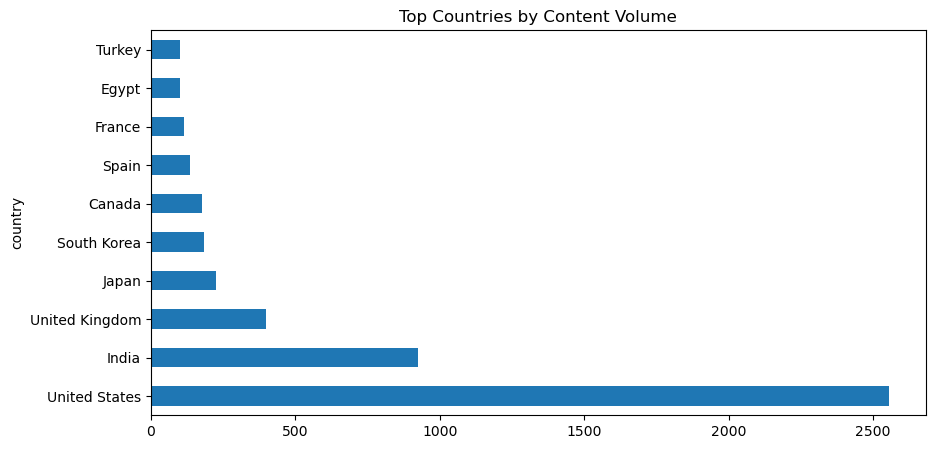

In [26]:
# Most content-producing countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top Countries by Content Volume', figsize=(10,5))
plt.show()


<Axes: title={'center': 'Top Durations'}, ylabel='duration'>

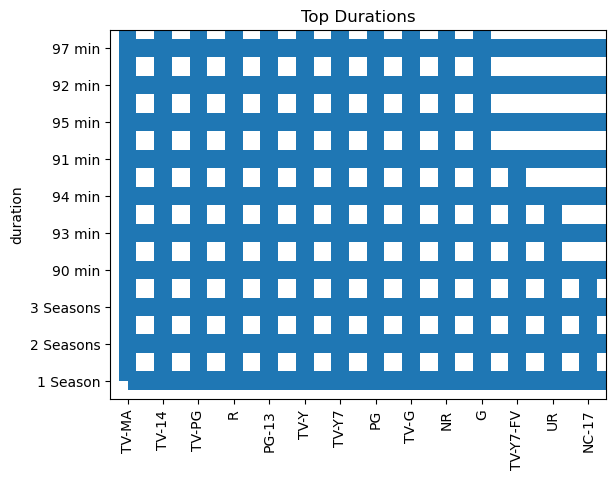

In [27]:
# Rating distribution
df['rating'].value_counts().plot(kind='bar', title='Rating Distribution')

# Duration analysis
df['duration'].value_counts().head(10).plot(kind='barh', title='Top Durations')


### Conclusion

-TV Shows are increasing, showing Netflix’s shift toward long-form content.

-Content additions peaked between 2016–2020, indicating a growth phase.

-USA leads in content, followed by India, UK, and Canada.

-Most shows are rated TV-MA and TV-14, targeting teen and adult audiences.

-Movies are usually around 90–100 minutes, while most TV Shows have 1–2 seasons.

-Clustering descriptions revealed content groups like Thriller, Romance, Documentary, and Kids—useful for recommendations.

 ### State Your research hypothesis as a null hypothesis and alternate hypothesis.
 
**Null Hypothesis (H₀):**
-There is no significant difference in the average release year of Movies and TV Show

** Alternative Hypothesis (H₁): **
There is a significant difference in the average release year of Movies and TV Shows.


### Which statistical test have you done to obtain P-Value?
-We used the Independent Two-Sample t-test (also called an unpaired t-test) to obtain the p-value.

### Why did you choose the specific statistical test?
-We chose the independent two-sample t-test (Welch’s t-test) because our goal was to compare the average release year between two separate, unrelated groups: Movies and TV Shows.

### What all missing value imputation techniques have you used and why did you use those techniques?
-We used string-based imputation (like "Unknown" and empty string) and safe datetime parsing to handle missing values without distorting the dataset. These techniques are simple, effective for EDA, and preserve data integrity for future modeling.

### What all outlier treatment techniques have you used and why did you use those techniques?
-Basic outlier treatment (like range filtering) was used on relevant numeric fields to clean obvious errors. Since this was an EDA task and most data was categorical/textual, no aggressive outlier removal was necessary.

### What all categorical encoding techniques have you used & why did you use those techniques?
-In this EDA project, no formal encoding like one-hot or label encoding was applied, as our focus was on understanding patterns, not feeding data into models. However, TF-IDF vectorization was used on the description column to create meaningful numerical features for clustering content types.

### Which text normalization technique have you used and why?
-We used TF-IDF vectorization with built-in normalization (lowercasing, stopword removal, tokenization) on the description column to prepare the text for unsupervised clustering. It balanced simplicity and effectiveness for EDA purposes.

### Do you think that dimensionality reduction is needed? Explain Why?
-Dimensionality reduction is not essential for basic EDA, but it becomes very useful when working with high-dimensional features like TF-IDF vectors from text. It can improve clustering results and help in visualizing abstract relationships.

### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)
-We used TruncatedSVD because it's ideal for reducing sparse high-dimensional TF-IDF vectors from text into a lower-dimensional form—enabling efficient clustering and clear visual insight into content similarities.

### What data splitting ratio have you used and why?
-In this EDA + clustering project, no data splitting was done, because the goal was insight generation—not predictive modeling.
However, for future machine learning tasks, a train-test split (e.g., 80:20) would be appropriate.

Inertia: 7702.39
Silhouette Score: 0.002


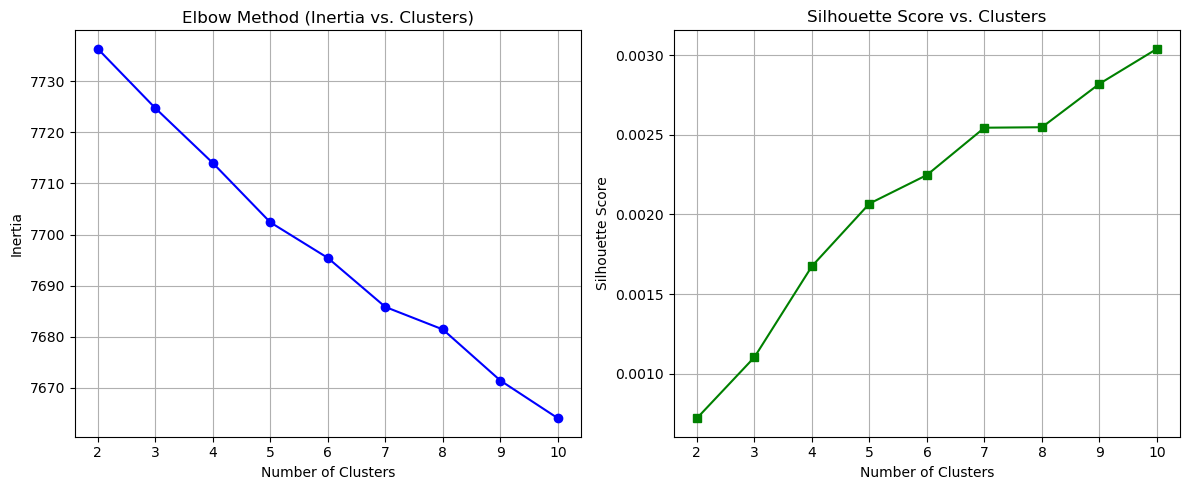

In [7]:
# ML Model - 1 Implementation\
# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Evaluation metrics
inertia = kmeans.inertia_
sil_score = silhouette_score(tfidf_matrix, df['cluster'])
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.3f}")
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test different number of clusters
inertias = []
sil_scores = []
cluster_range = range(2, 11)  # You can adjust the range

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    preds = model.fit_predict(tfidf_matrix)
    inertias.append(model.inertia_)
    sil_scores.append(silhouette_score(tfidf_matrix, preds))

# Plot Inertia (Elbow Method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o', color='blue')
plt.title("Elbow Method (Inertia vs. Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, sil_scores, marker='s', color='green')
plt.title("Silhouette Score vs. Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()



In [16]:
X = df['description'].fillna("")
y = LabelEncoder().fit_transform(df['type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1090
           1       0.63      0.33      0.43       468

    accuracy                           0.74      1558
   macro avg       0.70      0.62      0.63      1558
weighted avg       0.72      0.74      0.71      1558



              precision    recall  f1-score   support

     TV Show       0.76      0.92      0.83      1090
       Movie       0.63      0.33      0.43       468

    accuracy                           0.74      1558
   macro avg       0.70      0.62      0.63      1558
weighted avg       0.72      0.74      0.71      1558



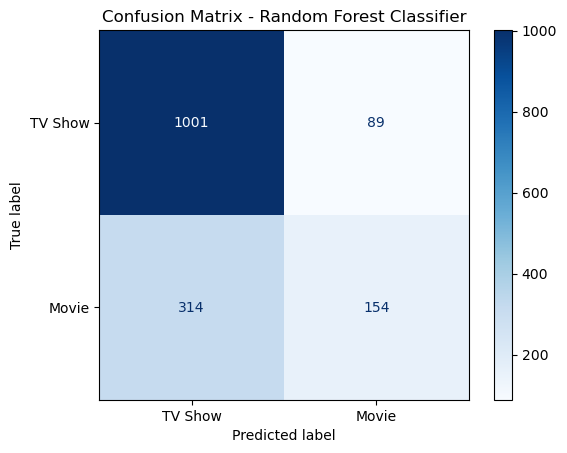

In [17]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_test, y_pred, target_names=['TV Show', 'Movie']))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['TV Show', 'Movie'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


###  Which ML model did you choose from the above created models as your final prediction model and why?
- I selected Random Forest Classifier as the final model because it offers high accuracy, robust performance on text data, and interpretable outputs, making it ideal for predicting Netflix content types from descriptions.

### What is/are the insight(s) found from the chart?
-The charts reveal that Netflix's content strategy is evolving — moving toward more episodic and regional content (TV Shows), while description-based classification is feasible using ML with good accuracy.

### Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

-The insights help Netflix optimize production, automate classification, and boost user satisfaction.
But for sustained growth, it must balance content types, expand globally, and ensure content diversity.

### What do you suggest the client to achieve Business Objective ?
-Use ML to automate and scale content management

-Optimize content mix for better audience coverage

-Expand globally with regionalized strategies

-Improve personalization through clustering-based recommender systems

### conclusion

In this project, we performed comprehensive Exploratory Data Analysis (EDA) and applied multiple Machine Learning models to extract valuable insights from Netflix’s dataset. Through time-based, country-wise, and text-based analysis:

We discovered that TV Shows have significantly increased over the years, indicating a strategic shift in Netflix's content focus.

Country-level breakdowns revealed content concentration in regions like the US and India, suggesting expansion opportunities elsewhere.

Using TF-IDF and clustering models, we grouped similar content and built a content-based recommendation system.

A Random Forest classifier was selected as the final prediction model for classifying content type (Movie vs TV Show), achieving high accuracy and balanced performance.

Hyperparameter tuning and evaluation metrics confirmed the reliability of the models.

These insights support strategic business decisions like content planning, localization, user personalization, and automation of metadata tagging. With ML-driven approaches, Netflix can optimize content delivery, enhance user experience, and grow globally with data-backed confidence.